In [104]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [49]:
pd.set_option('display.max_columns', 100)

In [3]:
games = pickle.load(open('games.pkl', 'rb'))

In [5]:
games_full = []
batting = []
pitching = []
pitchers = []

for g in games:
    game_summary = g['game']
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_full.append(game_summary)
    

In [30]:
games_df_temp = pd.DataFrame(games_full)

In [9]:
for g in games:
    pairs = [
        ('away_batting', batting),
        ('home_batting', batting),
        ('away_pitching', pitching),
        ('home_pitching', pitching),
        ('away_pitchers',pitchers ),
        ('home_pitchers', pitchers)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)
                

In [11]:
batting = pd.DataFrame(batting)

In [12]:
pitching = pd.DataFrame(pitching)

In [13]:
pitchers = pd.DataFrame(pitchers)

In [14]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,...,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,...,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,...,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,...,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,...,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,...,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [26]:
games_df.shape

(22631, 9)

In [38]:
games_df = games_df_temp[10:]

In [19]:
pitching.head()

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,...,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,home?,team,game_id
0,8,6,4,2,4,10,1,2.25,34,140,...,2,0,-0.267,1.68,-0.15%,1.62,0.3,False,CHW,ANA202104010
1,9,7,3,3,2,10,1,3.00,35,125,...,0,0,0.233,1.01,0.13%,0.95,1.8,True,LAA,ANA202104010
2,9,2,3,2,4,13,0,2.00,34,151,...,0,0,0.327,1.24,0.21%,1.31,1.6,False,PIT,CHN202104010
3,9,9,5,5,11,10,1,5.00,47,214,...,8,1,-0.173,1.05,-0.11%,1.07,-0.4,True,CHC,CHN202104010
4,9,10,6,6,5,8,2,6.00,42,176,...,3,1,0.027,0.54,0.02%,0.59,-0.8,False,STL,CIN202104010


In [50]:
pitchers

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id
0,5.1,2,2,2,2,8,1,3.38,20,87,59,29,17,13,2,8,3,0,62,,,0.088,0.98,0.05%,0.95,0.9,giolilu01,False,CHW,ANA202104010
1,1.2,2,0,0,1,1,0,0.00,7,20,12,8,2,2,2,3,2,0,,0,0,0.160,1.82,0.09%,1.75,0.8,heuerco01,False,CHW,ANA202104010
2,0.2,2,2,0,1,1,0,0.00,6,28,18,9,5,4,4,0,0,0,,0,0,-0.552,3.60,-0.32%,3.47,-2.1,bummeaa01,False,CHW,ANA202104010
3,0.1,0,0,0,0,0,0,0.00,1,5,3,1,2,0,1,0,0,0,,2,0,0.037,1.22,0.02%,1.18,0.6,fostema01,False,CHW,ANA202104010
4,6,6,3,3,1,6,1,4.50,25,88,59,33,12,14,10,8,4,0,53,,,-0.051,0.94,-0.03%,0.88,0.2,bundydy01,True,LAA,ANA202104010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187414,4.1,4,8,7,3,1,2,5.59,21,85,47,33,6,8,8,8,6,0,23,,,-0.330,0.91,-0.18%,0.84,-3.9,castery01,True,COL,COL202009180
187415,1.2,6,3,3,0,0,1,9.33,10,33,19,14,1,4,6,4,2,0,,2,2,-0.128,0.34,-0.07%,0.31,-3.3,hoffmje02,True,COL,COL202009180
187416,0.2,4,4,4,0,1,0,20.77,6,28,18,12,2,4,3,2,2,0,,0,0,-0.036,0.18,-0.02%,0.17,-2.8,daviswa01,True,COL,COL202009180
187417,1,1,0,0,0,0,0,6.30,4,19,13,9,1,3,3,1,1,0,,1,1,-0.002,0.03,-0.00%,0.03,-0.1,kinlety01,True,COL,COL202009180


In [51]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [47]:
batting.dtypes

AB                      object
R                       object
H                       object
RBI                     object
BB                      object
SO                      object
PA                      object
batting_avg             object
onbase_perc             object
slugging_perc           object
onbase_plus_slugging    object
pitches                 object
strikes_total           object
wpa_bat                 object
leverage_index_avg      object
wpa_bat_pos             object
wpa_bat_neg             object
cwpa_bat                object
cli_avg                 object
re24_bat                object
PO                      object
A                       object
details                 object
home?                     bool
team                    object
game_id                 object
dtype: object

In [52]:
numeric_stats = ['AB', 'R', 'H', 'RBI',
                 'BB','SO', 'batting_avg',
                 'onbase_perc','slugging_perc','onbase_plus_slugging',
                 'pitches', 'strikes_total', 'wpa_bat','leverage_index_avg']

In [53]:
for stat in numeric_stats:
    batting[stat] = batting[stat].astype(float)

In [109]:
team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO'].mean()).reset_index().rename(columns = {'team':'abbr'})

<ipython-input-109-f77fd067bb35>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO'].mean()).reset_index().rename(columns = {'team':'abbr'})


In [110]:
team_batting

,abbr,R,SO
0,ARI,4.489066,8.119284
1,ATL,4.323159,8.019244
2,BAL,4.415232,8.208609
3,BOS,4.888742,7.737086
4,CHC,4.348776,8.455989
5,CHW,4.243207,8.292247
6,CIN,4.204500,8.047651
7,CLE,4.516921,7.408759
8,COL,4.794702,8.133113
9,DET,4.392691,7.787375


In [63]:
games_df

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score
10,OAK201203280,SEA,OAK,"Wednesday, March 28, 2012",Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3
11,OAK201203290,SEA,OAK,"Thursday, March 29, 2012",Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1
12,MIA201204040,STL,MIA,"Wednesday, April 4, 2012",Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4
13,CHN201204050,WSN,CHC,"Thursday, April 5, 2012",Start Time: 1:25 p.m. Local,dempsry01,strasst01,1,2
14,CIN201204050,MIA,CIN,"Thursday, April 5, 2012",Start Time: 4:10 p.m. Local,cuetojo01,buehrma01,4,0
...,...,...,...,...,...,...,...,...,...
22626,BAL202009180,TBR,BAL,"Friday, September 18, 2020",Start Time: 7:35 p.m. Local,cobbal01,glasnty01,1,2
22627,BOS202009180,NYY,BOS,"Friday, September 18, 2020",Start Time: 7:30 p.m. Local,perezma02,montgjo01,5,6
22628,CHN202009180,MIN,CHC,"Friday, September 18, 2020",Start Time: 7:15 p.m. Local,hendrky01,hillri01,1,0
22629,CIN202009180,CHW,CIN,"Friday, September 18, 2020",Start Time: 7:10 p.m. Local,mahlety01,stievjo01,7,1


In [64]:
cond = (games_df['home_score']>games_df['away_score'], games_df['home_score']<games_df['away_score'])
choices = (True, False)
games_df['Home_win'] = np.select(cond, choices)

<ipython-input-64-a89e95912b55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['Home_win'] = np.select(cond, choices)


In [88]:
home_wins = pd.DataFrame(games_df.groupby('home_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'home_abbr':'abbr'} )

In [89]:
away_wins = pd.DataFrame(games_df.groupby('away_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'away_abbr':'abbr'} )

In [90]:
away_wins['away_wins'] = away_wins['count'] - away_wins['sum']

In [94]:
total_wins = pd.merge(home_wins, away_wins, on = 'abbr').rename(columns = {'sum_x':'home_wins'})

In [97]:
total_wins['total_wins'] = total_wins['away_wins'] + total_wins['home_wins']
total_wins['total_games'] = total_wins['count_x'] + total_wins['count_y']

In [98]:
total_wins

,abbr,home_wins,count_x,sum_y,count_y,away_wins,total_wins,total_games
0,ARI,357,753,418,756,338,695,1509
1,ATL,411,752,394,755,361,772,1507
2,BAL,415,757,413,753,340,755,1510
3,BOS,393,755,386,755,369,762,1510
4,CHC,428,761,410,749,339,767,1510
5,CHW,415,755,423,753,330,745,1508
6,CIN,406,752,414,758,344,750,1510
7,CLE,417,751,389,755,366,783,1506
8,COL,408,757,439,752,313,721,1509
9,DET,413,752,418,752,334,747,1504


In [103]:
wins_and_runs = pd.merge(total_wins, runs)

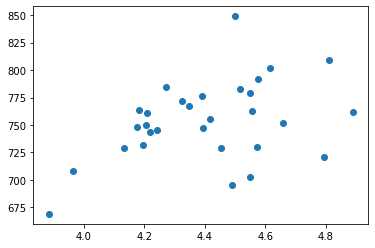

In [113]:
plt.scatter(x= wins_and_runs['R'], y = wins_and_runs['total_wins']);

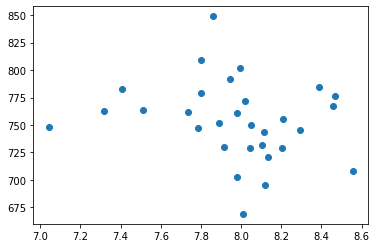

In [114]:
plt.scatter(x=wins_and_runs['SO'], y = wins_and_runs['total_wins']);

In [ ]:
# Runs per game important, Strikeouts not as important. Trend Doesnt stand out